# The Spark Foundation - Data Science & Business Analytics Internship
## TASK-3 'Exploratory Data Analysis' on dataset ‘SampleSuperstore’
### Author- Aaryan Raaz
### Batch- December 2022


# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading the dataset 

In [2]:
url="https://raw.githubusercontent.com/aaryan-00/The-Sparks-Foundation-Intern/main/SampleSuperstore.csv"
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Preprocessing and Analysis

In [4]:
dataset.shape

(9994, 13)

In [5]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# checking for duplicate values
dataset.duplicated().sum()

17

In [10]:
# dropping the duplicates
dataset.drop_duplicates()
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<function matplotlib.pyplot.show(close=None, block=None)>

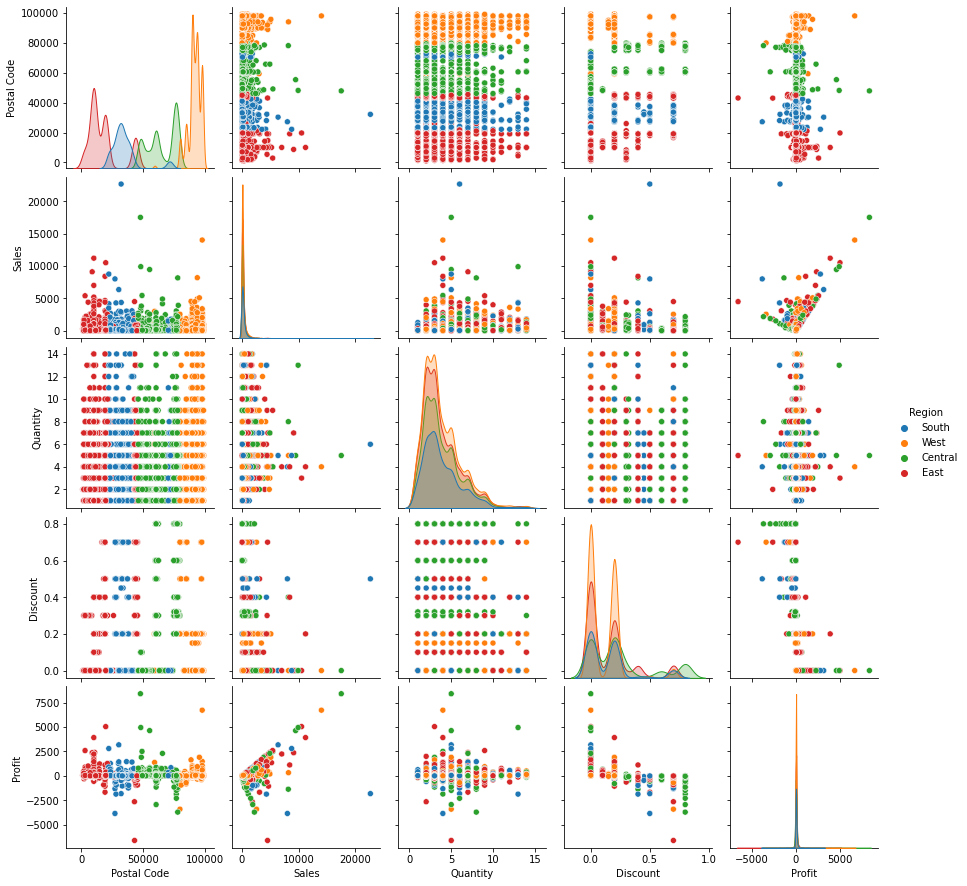

In [11]:
# visualizing the dataset as a whole using the pair plot
import seaborn as sns 
sns.pairplot(dataset,hue='Region')
plt.show

In [12]:
# removing the unnecessary columns such as postal code
dataset = dataset.drop(['Postal Code'],axis=1)

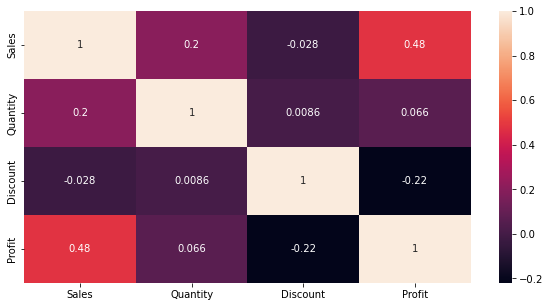

In [13]:
# finding the pairwise correlations between the columns and visualising using heatmaps
dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## Univariate Analysis

In [14]:
dataset["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Shipping mode wise distribution of orders')

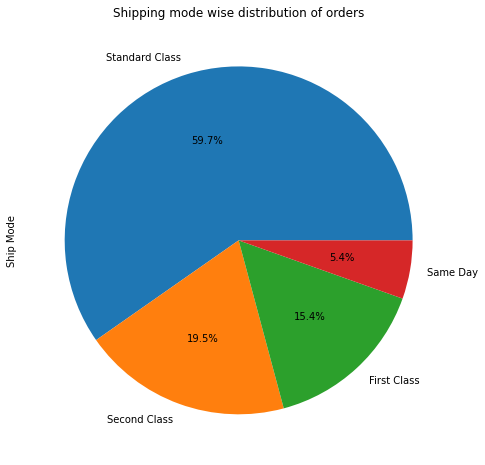

In [15]:
dataset['Ship Mode'].value_counts().plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')
plt.title('Shipping mode wise distribution of orders')

### Observation : 'Standard Shipping' mode is highly preferred whersas 'Same Day' is least

In [16]:
dataset["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Segmentwise distribution')

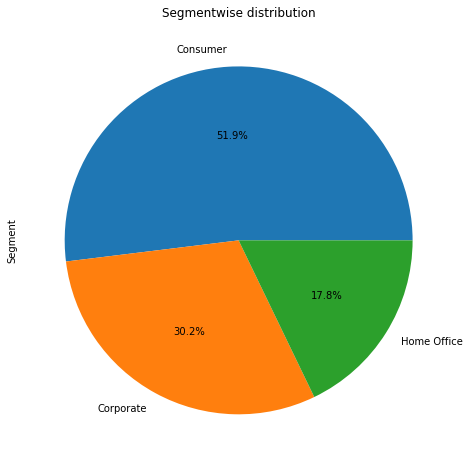

In [17]:
dataset['Segment'].value_counts().plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')
plt.title('Segmentwise distribution')

### Observation : 50% of people belong to consumer class whereas 20-30% people belong to Home Office & Corporate

In [18]:
dataset['Country'].value_counts()
# all the orders are within the United states

United States    9994
Name: Country, dtype: int64

### Observation : All works are within the United States, So this can be dropped

In [19]:
dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'Categorywise distribution')

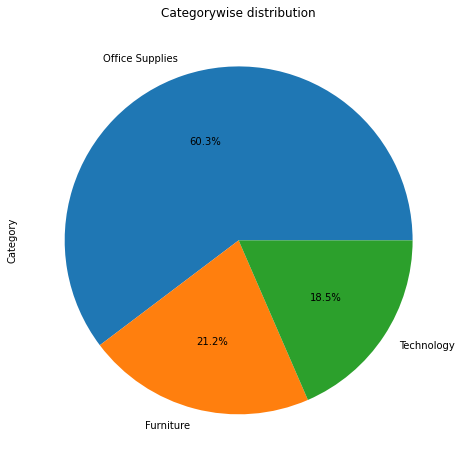

In [20]:
dataset['Category'].value_counts().plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')
plt.title('Categorywise distribution')

### Observation : 60% of the Categories belong to Office Supplies whereas approximately 20% of Categories belongs to Furniture and Technology supplies each

In [21]:
dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:ylabel='Sub-Category'>

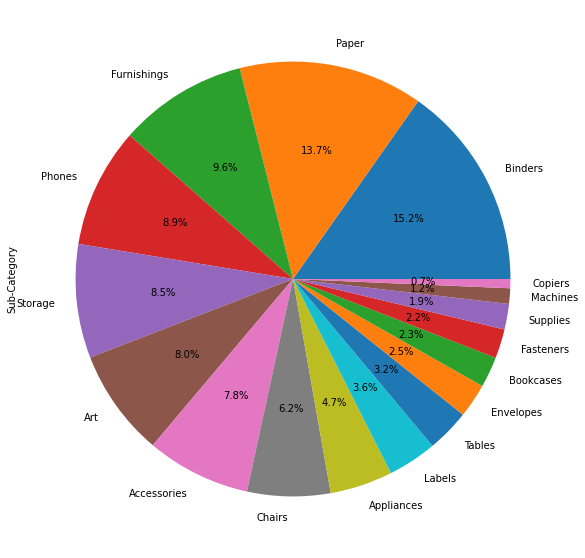

In [22]:
dataset['Sub-Category'].value_counts().plot(kind = 'pie', figsize = [10,10], autopct='%1.1f%%')

### Observation : Binders and Papers are the most exisiting Sub-Category in Superstore

In [23]:
dataset['City'].value_counts().head(15)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Name: City, dtype: int64

Text(0.5, 1.0, 'Top 15 Cities having most order placed')

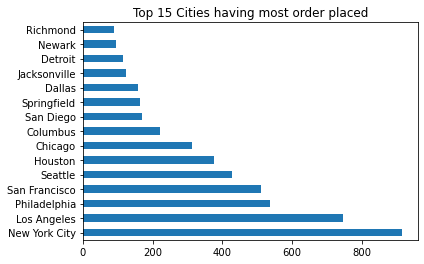

In [24]:
dataset['City'].value_counts().head(15).plot(kind = 'barh')
plt.title('Top 15 Cities having most order placed')

### Observation : Most no of order is placed in New York City

In [25]:
dataset['State'].value_counts().head()

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

Text(0.5, 1.0, 'State wise order distribution')

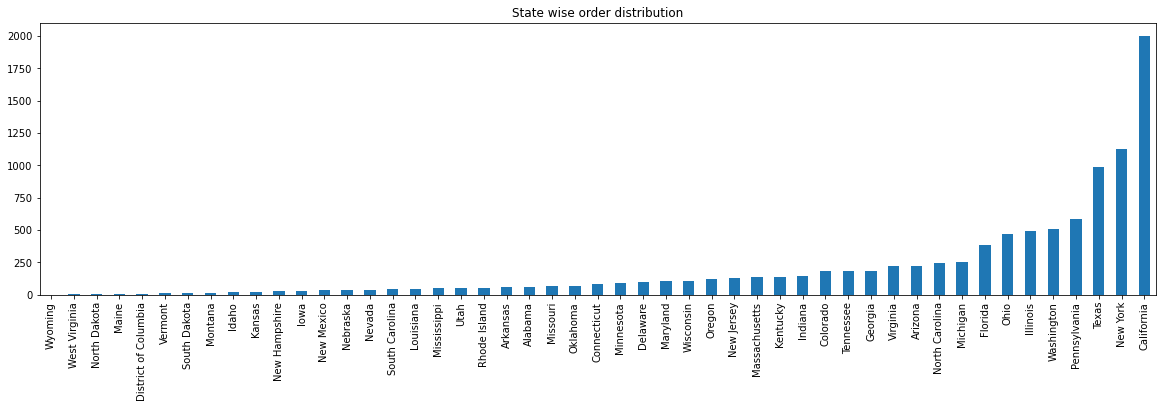

In [26]:
dataset['State'].value_counts().sort_values(ascending = True).plot(kind = 'bar', figsize =[20,5])
plt.title('State wise order distribution')

### Observation : In case of State, Most no of order is placed in California

In [27]:
dataset['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

Text(0.5, 1.0, 'Regionwise orders distribution')

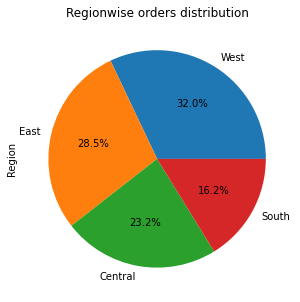

In [28]:
dataset['Region'].value_counts().plot(kind = 'pie', figsize=[5,5], autopct='%1.1f%%')
plt.title('Regionwise orders distribution')

### Observation : West Region has the maximum sale of 32%

## Bivariate Analysis

In [29]:
categorical_sum=dataset.groupby("Category").sum()
categorical_sum

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741999.7953,8028,368.89,18451.2728
Office Supplies,719047.0320,22906,947.80,122490.8008
Technology,836154.0330,6939,244.40,145454.9481


<AxesSubplot:xlabel='Category'>

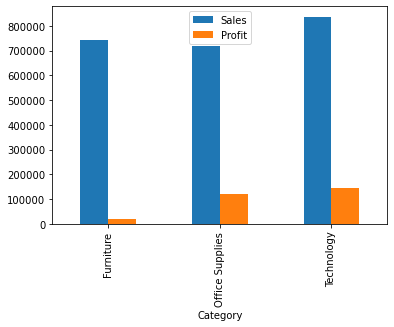

In [30]:
categorical_sum[['Sales', 'Profit']].plot.bar()

### Observation :
#### From this Graph, We can conclude that:
    Techology Products has the highest Sales and Profit, So we should encourage the sell of office supplies.
    Furniture has moderate Sales but less Profit, So we should limit the sale of furniture.
    Office Suplies has the least Sales but moderate Profit.

In [31]:
subcategorical_sum=dataset.groupby("Sub-Category").sum()
subcategorical_sum

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27118.7920,3000,59.60,6527.7870
Binders,203412.7330,5974,567.00,30221.7633
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,328449.1030,2356,105.00,26590.1663
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


Text(0, 0.5, 'Total Sales/Profits')

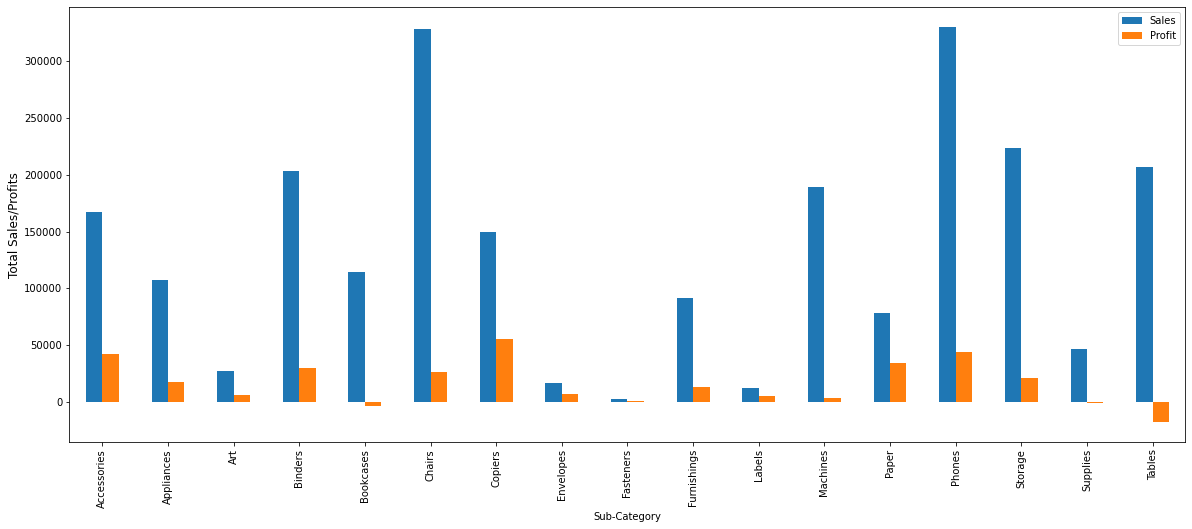

In [32]:
subcategorical_sum[['Sales', 'Profit']].plot(kind = 'bar', figsize = [20,8])
plt.ylabel('Total Sales/Profits',fontsize = 12)

### Observation : From the above graph we can see that tables have the lowest profit and Copiers have the highest profit. The sales is highest in case of phones and lowest in case of Fasteners.

Text(0, 0.5, 'Profit')

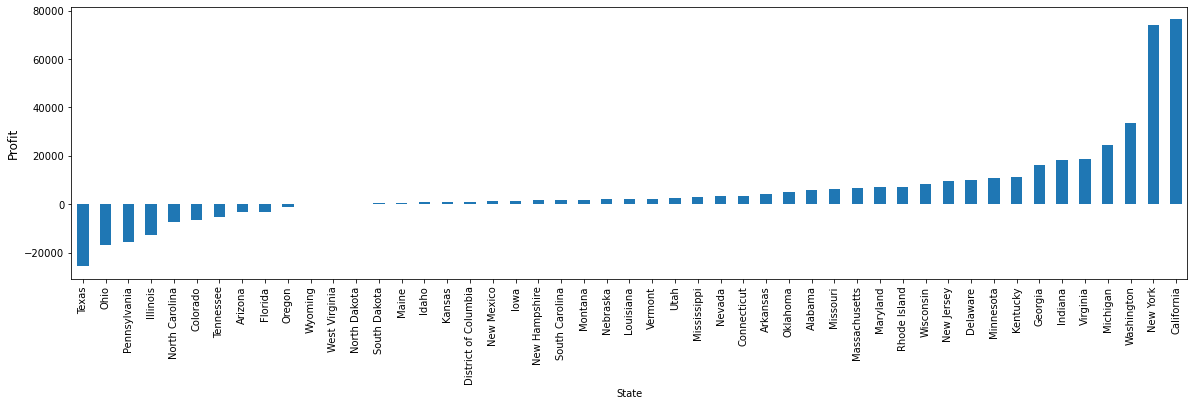

In [33]:
dataset.groupby(by ='State')['Profit'].sum().sort_values(ascending = True).plot(kind = 'bar',figsize=[20,5])
plt.ylabel('Profit',fontsize = 12)

### Observation: Maximum profit is in California and maximum loss is in Texas

Text(0.5, 1.0, 'Discount and Profit')

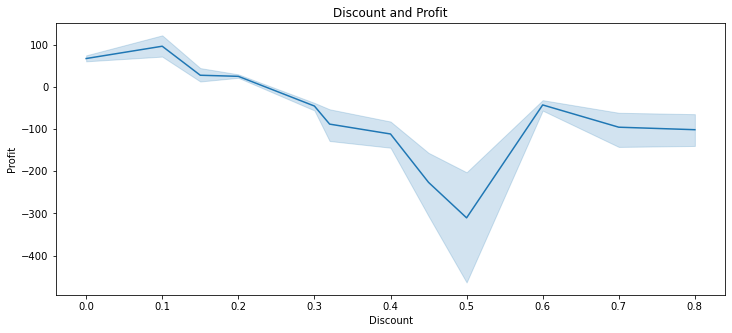

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=dataset)
plt.title("Discount and Profit")

Text(0.5, 1.0, 'Discount VS Sales')

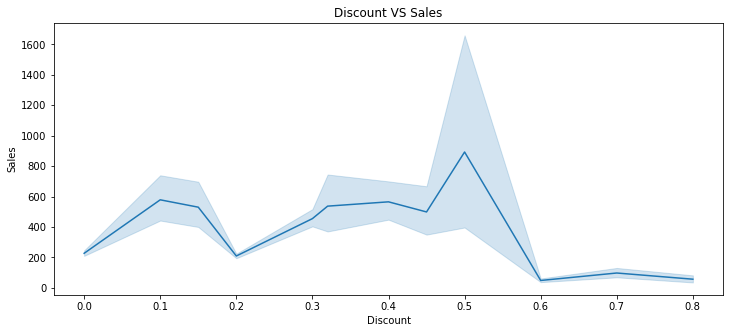

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Sales',data=dataset)
plt.title('Discount VS Sales')

### Observation: The graph clearly shows that if we give more discount on our products, sales increases but profit decreases.

## Conclusion
    1.Discount > 30% to the Segment, would result in loss whereas <30% is making profit.
    2.We should limit sales of furniture and increase that of technology and office suppliers as furniture has very           less profit as compared to sales.
    3.In the sub-gategories, we are facing huge loss on the sale of tables so its sale should be minimized
    4.We should concentrate on the states like 'New York' and 'California' to make more profits.